In [74]:
import matplotlib.pyplot as plt
import importlib

import classes_calc

# Reload the module when changes are made
importlib.reload(classes_calc)

<module 'classes_calc' from 'C:\\Users\\User\\AAAMio\\Projects\\PyTorch\\classes_calc.py'>

In [75]:
window= 52
down_pcts= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
up_pcts= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
calculator = classes_calc.ClassesCalc(window, down_pcts, up_pcts)

In [76]:
def build_download_url(
    api_key,
    ticker,
    start_date,
    end_date,
    sampling_interval,
    after_hours
):
    """Documentation: https://www.tiingo.com/documentation/iex"""

    start_date_str= start_date.strftime("%Y-%m-%d")
    end_date_str= end_date.strftime("%Y-%m-%d")
    after_hours_str= "true" if after_hours else "false"

    return (
        f"https://api.tiingo.com/iex/{ticker}/prices?"
        f"token={api_key}&"
        f"startDate={start_date_str}&"
        f"endDate={end_date_str}&"
        f"resampleFreq={sampling_interval}min&"
        f"afterHours={after_hours_str}&"
        f"format=csv"
    )

In [77]:
from datetime import datetime, timedelta
import requests

def download_ticker(
    api_key: str,
    ticker: str,
    start_date : datetime,
    end_date : datetime,
    sampling_interval: int,
    after_hours: bool,
):
    url = build_download_url(
        api_key, 
        ticker, 
        start_date, 
        end_date, 
        sampling_interval, 
        after_hours)
    
    print(
        f"Retrieving {ticker} from {start_date} to {end_date} on {sampling_interval}m - {url}"
    )

    return make_request_with_retry(url)


def make_request_with_retry(url, retries=5, delay=1):
    headers = {"Content-Type": "application/json"}
    for attempt in range(retries + 1):
        try:
            response = requests.get(url, headers)
            response.raise_for_status()  # Raise an exception for non-2xx responses
            return response.text
        except requests.RequestException as e:
            if response.status_code == 404:
                print(f"404 error: {e}")
                return None
            if attempt < retries:
                print(f"Transient error occurred. Retrying in {delay} seconds...")
                time.sleep(delay)
                delay *= 2  # Exponential backoff
            else:
                print(f"Error: {e}")
                raise

In [78]:
csv_data= download_ticker("REMOVED_SECRET", "DNA", datetime(2022, 6, 15), datetime(2023,11,26), 15, False)

Retrieving DNA from 2022-06-15 00:00:00 to 2023-11-26 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=REMOVED_SECRET&startDate=2022-06-15&endDate=2023-11-26&resampleFreq=15min&afterHours=false&format=csv


In [79]:
csv_data

'date,close,high,low,open,volume\n2022-06-15 09:30:00-04:00,2.495,2.555,2.475,2.515,29348.0\n2022-06-15 09:45:00-04:00,2.475,2.505,2.445,2.495,16399.0\n2022-06-15 10:00:00-04:00,2.495,2.51,2.47,2.475,27418.0\n2022-06-15 10:15:00-04:00,2.5,2.505,2.455,2.49,18290.0\n2022-06-15 10:30:00-04:00,2.435,2.505,2.425,2.495,21304.0\n2022-06-15 10:45:00-04:00,2.415,2.44,2.41,2.435,6556.0\n2022-06-15 11:00:00-04:00,2.455,2.465,2.405,2.415,7704.0\n2022-06-15 11:15:00-04:00,2.535,2.535,2.45,2.455,20159.0\n2022-06-15 11:30:00-04:00,2.51,2.535,2.5,2.525,12112.0\n2022-06-15 11:45:00-04:00,2.555,2.565,2.51,2.51,26772.0\n2022-06-15 12:00:00-04:00,2.58,2.605,2.55,2.555,16097.0\n2022-06-15 12:15:00-04:00,2.565,2.58,2.545,2.58,13243.0\n2022-06-15 12:30:00-04:00,2.545,2.57,2.54,2.565,8055.0\n2022-06-15 12:45:00-04:00,2.495,2.555,2.49,2.545,8842.0\n2022-06-15 13:00:00-04:00,2.525,2.535,2.49,2.495,6670.0\n2022-06-15 13:15:00-04:00,2.53,2.535,2.49,2.53,11846.0\n2022-06-15 13:30:00-04:00,2.545,2.575,2.525,2.53,12

In [80]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(csv_data))

In [81]:
close_list = df['close'].astype(float).tolist()
close_list

[2.495,
 2.475,
 2.495,
 2.5,
 2.435,
 2.415,
 2.455,
 2.535,
 2.51,
 2.555,
 2.58,
 2.565,
 2.545,
 2.495,
 2.525,
 2.53,
 2.545,
 2.545,
 2.525,
 2.56,
 2.72,
 2.645,
 2.605,
 2.645,
 2.605,
 2.59,
 2.445,
 2.355,
 2.33,
 2.325,
 2.29,
 2.325,
 2.335,
 2.375,
 2.365,
 2.355,
 2.375,
 2.385,
 2.4,
 2.405,
 2.405,
 2.415,
 2.395,
 2.375,
 2.375,
 2.355,
 2.355,
 2.355,
 2.345,
 2.345,
 2.315,
 2.315,
 2.375,
 2.41,
 2.355,
 2.315,
 2.315,
 2.315,
 2.335,
 2.335,
 2.335,
 2.345,
 2.385,
 2.395,
 2.405,
 2.415,
 2.425,
 2.42,
 2.435,
 2.395,
 2.395,
 2.405,
 2.415,
 2.41,
 2.385,
 2.395,
 2.345,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.365,
 2.495,
 2.515,
 2.515,
 2.505,
 2.555,
 2.615,
 2.595,
 2.565,
 2.525,
 2.515,
 2.515,
 2.495,
 2.515,
 2.535,
 2.545,
 2.54,
 2.525,
 2.525,
 2.505,
 2.495,
 2.485,
 2.465,
 2.485,


In [90]:
classes= calculator.calculate(close_list)
print(classes[-100:])

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


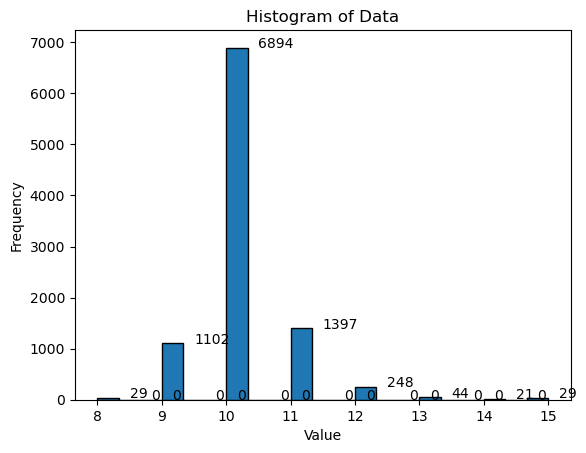

In [83]:
import matplotlib.pyplot as plt

# Create a histogram
hist_values, bin_edges, _ = plt.hist(classes, bins=21, edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display frequency on top of each bar
for value, edge in zip(hist_values, bin_edges[:-1]):
    plt.text(edge + 0.5, value + 0.1, str(int(value)), color='black')
    
# Show the histogram
plt.show()


In [84]:
from collections import Counter

# Calculate the frequency of each element
frequency_dict = Counter(classes)

# Print the result
num_ticks= len(classes)
print(f"Stock ticks: {num_ticks}")
for element, frequency in frequency_dict.items():
    percent=0
    position= element - len(down_pcts)
    if position < 0:
        percent= -1 * down_pcts[-1 * position - 1] 
    elif position > 0:
        percent= up_pcts[position - 1]
        
    print(f"{percent}% change ({element}): {frequency} times {(frequency/num_ticks*100):0.2f}%")


Stock ticks: 9816
0% change (10): 6894 times 70.23%
10% change (11): 1397 times 14.23%
-10% change (9): 1102 times 11.23%
20% change (12): 248 times 2.53%
30% change (13): 44 times 0.45%
40% change (14): 21 times 0.21%
50% change (15): 29 times 0.30%
-20% change (8): 29 times 0.30%
0% change (nan): 52 times 0.53%


In [94]:
import importlib

import signals_calc

# Reload the module when changes are made
importlib.reload(signals_calc)

windows= [2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]
signals_calculator = signals_calc.SignalsCalc(windows)

windows_rolling_avg = signals_calculator.calculate(close_list)
windows_rolling_avg

[[nan,
  2.4850000000000003,
  2.4850000000000003,
  2.4975000000000005,
  2.4675000000000002,
  2.4250000000000003,
  2.4350000000000005,
  2.4950000000000006,
  2.5225000000000004,
  2.5325000000000006,
  2.567500000000001,
  2.5725000000000007,
  2.5550000000000006,
  2.5200000000000005,
  2.5100000000000007,
  2.5275000000000007,
  2.5375000000000005,
  2.545000000000001,
  2.535000000000001,
  2.5425000000000013,
  2.6400000000000015,
  2.6825000000000014,
  2.6250000000000013,
  2.6250000000000013,
  2.6250000000000013,
  2.597500000000001,
  2.517500000000001,
  2.4000000000000012,
  2.342500000000001,
  2.3275000000000015,
  2.3075000000000014,
  2.3075000000000014,
  2.3300000000000014,
  2.3550000000000013,
  2.3700000000000014,
  2.360000000000001,
  2.365000000000001,
  2.380000000000001,
  2.392500000000001,
  2.4025000000000007,
  2.4050000000000007,
  2.410000000000001,
  2.405000000000001,
  2.385000000000001,
  2.375000000000001,
  2.365000000000001,
  2.35500000000000

In [95]:
print(len(close_list))
print(len(windows_rolling_avg[15]))


9816
9816


In [96]:
from typing import List

@staticmethod
def calculate_price_proportions(prices: List[float], averages_list: List[List[float]]) -> List[List[float]]:
    list_of_list_proportions= []
    for averages in averages_list:
        list_proportions= []
        for idx in range(len(averages)):
            list_proportions.append((prices[idx]-averages[idx])/prices[idx])

        list_of_list_proportions.append(list_proportions)

    return list_of_list_proportions

In [97]:
proportions= calculate_price_proportions(close_list, windows_rolling_avg)


In [130]:
print(close_list[-10:])
print(windows_rolling_avg[0][-10:])
print(proportions[0][-10:])
current_sum = sum(close_list[-2:])/2
print(current_sum)
print(f"Classes: {classes[-53:-50]} len: {len(classes)}")
print(f"Proportions: {proportions[15][2582:2584]} len: {len(proportions[15])}")
print(f"Proportions Min: {min(proportions[15][2583:-53])} Max: {max(proportions[0][2583:-53])}")

[1.425, 1.4, 1.415, 1.415, 1.425, 1.425, 1.425, 1.44, 1.445, 1.45]
[1.4200000000000066, 1.4125000000000065, 1.4075000000000064, 1.4150000000000065, 1.4200000000000066, 1.4250000000000065, 1.4250000000000065, 1.4325000000000063, 1.4425000000000063, 1.4475000000000064]
[0.0035087719298199675, -0.008928571428576155, 0.005300353356885952, -4.550737486096048e-15, 0.0035087719298199675, -4.5188024861936195e-15, -4.5188024861936195e-15, 0.005208333333328905, 0.0017301038062240341, 0.0017241379310300052]
1.4475
Classes: [10, nan, nan] len: 9816
Proportions: [nan, -0.042870423340963096] len: 9816
Proportions Min: -0.6895424836601299 Max: 0.07314148681054872


In [144]:
targets = classes[2583:-52]
print(f"Classes: {len(classes)} targets: {len(targets)}")
inputs = []
for list in proportions:
    list_cut=list[2583:-52]
    print(list_cut[0:2])
    inputs.append(list_cut)
    

print(f"Inputs {len(inputs[15])}")

Classes: 9816 targets: 7181
[0.002717391304348573, -0.000907441016333113]
[0.0006038647342983241, 0.0006049606775549251]
[0.00036231884058095747, -0.002177858439200245]
[-0.0006793478260863387, -0.002722323049001112]
[0.00041806020066854086, -0.0022337009632837903]
[0.005693581780537124, 0.0035433411113980147]
[0.011508951406650252, 0.00896765239671257]
[0.020421607378129692, 0.017653852499588073]
[0.023957824458558645, 0.022247598849896556]
[0.014065016103058804, 0.011494252873562436]
[0.047847857187285306, 0.045636883387986736]
[0.03967727674625132, 0.038098080653944266]
[-0.03077631266333612, -0.032215643688073996]
[-0.04948570547552502, -0.05139039822593428]
[-0.05732328732315379, -0.059171745571042725]
[-0.042870423340963096, -0.04479963252853161]
Inputs 7181


In [150]:
import torch

# TODO: Only 4 decimals in the X values, should not be more? How to increase?
X = torch.Tensor(inputs)
X = X.T
y = torch.Tensor(targets)

In [151]:
train_split= int(0.8 * len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]

In [152]:
X_train

tensor([[ 0.0027,  0.0006,  0.0004,  ..., -0.0495, -0.0573, -0.0429],
        [-0.0009,  0.0006, -0.0022,  ..., -0.0514, -0.0592, -0.0448],
        [-0.0018, -0.0030, -0.0036,  ..., -0.0552, -0.0629, -0.0486],
        ...,
        [ 0.0045,  0.0060, -0.0036,  ...,  0.0654,  0.1015,  0.1981],
        [ 0.0023,  0.0060,  0.0036,  ...,  0.0696,  0.1054,  0.2016],
        [ 0.0045,  0.0075,  0.0134,  ...,  0.0778,  0.1134,  0.2086]])

In [154]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

epochs= 3

for epoch in range(epochs):
    X= X.to(device)
    y= y.to(device)

    model_0.train()

    y_pred= model_0(X)

    loss= loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)
